<h1>PCA (1) applied to an Circle</h1>

<h2>Get Component 1 from a circle<br>*compare to PCA - ellipse</h2>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

<h2>Circle equation</h2>

In [2]:
#center=(0,0)
#x max = 1
#y max = 1
#radius = 1

def x_circle_center_origin(y:float):
    return math.sqrt(1 - (y**2))

<h3>500 random points from a uniform distribution</h3>

In [3]:
lt_coordinates = list()
for _ in range(0,500):
    y = np.random.uniform(-1,1)
    lt_coordinates.append((x_circle_center_origin(y),y))   
    lt_coordinates.append((-1 * x_circle_center_origin(y),y))

In [6]:
np_arr = np.array(lt_coordinates)
x, y = np_arr.T

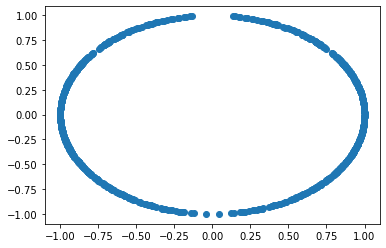

In [7]:
plt.scatter(x, y)
plt.show()

In [8]:
np_arr

array([[ 0.85481049,  0.5189403 ],
       [-0.85481049,  0.5189403 ],
       [ 0.35605565,  0.93446475],
       ...,
       [-0.89705676, -0.44191535],
       [ 0.87729203, -0.47995697],
       [-0.87729203, -0.47995697]])

In [9]:
df_data = pd.DataFrame(np_arr)
df_data.rename(columns={0:"X",1:"Y"},inplace=True)

In [10]:
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=1))
pca_data = pca_pipeline.fit_transform(df_data)

<h3>With component one, only 50% of variance</h3>

In [11]:
sum(pca_pipeline['pca'].explained_variance_ratio_)

0.5000000000000001

In [12]:
len(pca_data)

1000

In [13]:
type(pca_data)

numpy.ndarray

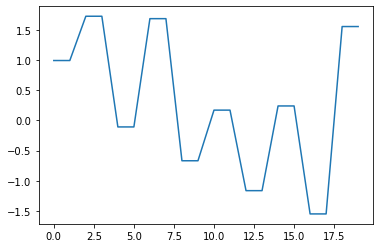

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.plot(pca_data[0:20]);